# Statistical analysis and tests (Multiple Populations) on BOW_2019Q2.BOW_Fem_Simul****

Univariate analysis is perhaps the simplest form of statistical analysis. The key fact is that only one variable is involved.

Bivariate analysis involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

Hypothesis tests are used in determining what outcomes of a study would lead to a rejection of the null hypothesis for a pre-specified level of significance.

* [Setup and loading the data](#setup)
* [Preprocessing of the data](#preprocessing)
* [Statistical analysis and vizualisation](#general)
* [Single population tests](#tests_single)
* [Two-population tests](#tests_two_pop)

<center><strong>Select Cell > Run All to execute the whole analysis</strong></center>

## Setup and dataset loading <a id="setup" /> 

First of all, let's load the libraries that we'll use

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dataiku                               # Access to Dataiku datasets
import pandas as pd, numpy as np             # Data manipulation 
from matplotlib import pyplot as plt         # Graphing
import seaborn as sns                        # Graphing
#sns.set(style="white")                       # Tuning the style of charts
import warnings                              # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from scipy import stats                      # Stats

ModuleNotFoundError: No module named 'dataiku'

The first thing we do is now to load the dataset and put aside the three main types of columns:

* Numerics
* Categorical
* Dates

Statistical analysis requires having the data in memory, we are only going to load a sample of the data. Modify the following cell to change the size of the sample.

In [3]:
dataset_limit = 10000

Load a DSS dataset as a Pandas dataframe

In [4]:
# Take a handle on the dataset
mydataset = dataiku.Dataset("BOW_2019Q2.BOW_Fem_Simul")

# Load the first lines.
# You can also load random samples, limit yourself to some columns, or only load
# data matching some filters.
#
# Please refer to the Dataiku Python API documentation for more information
df = mydataset.get_dataframe(limit = dataset_limit)

# Due to a bug in the current release (0.7) of seaborn we will need to strip non ASCII characters from columns...
import unicodedata
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
df.columns = [strip_accents(col) for col in df.columns]

df_orig = df.copy()

# Get the column names
numerical_columns = list(df.select_dtypes(include=[np.number]).columns)
categorical_columns = list(df.select_dtypes(include=[object]).columns)
date_columns = list(df.select_dtypes(include=['<M8[ns]']).columns)

# Print a quick summary of what we just loaded
print "Loaded dataset"
print "   Rows: %s" % df.shape[0]
print "   Columns: %s (%s num, %s cat, %s date)" % (df.shape[1], 
                                                    len(numerical_columns), len(categorical_columns),
                                                    len(date_columns))

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Loaded dataset")? (<ipython-input-4-801ce29a8a89>, line 25)

## Preprocessing of the data <a id="preprocessing" />
We assume that the values are in the first numerical column, and population labels in the first categorical column.

In [5]:
value_col = numerical_columns[0]
population_col = categorical_columns[0]

NameError: name 'numerical_columns' is not defined

Uncomment the following lines to take control on this

In [6]:
#value_col = u'my_value_column'
#population_col = u'my_population_column'
print "Selected value and population columns are '%s' and '%s'" % (value_col, population_col)

SyntaxError: invalid syntax (<ipython-input-6-deaa87373a48>, line 3)

We impute missing values in the value column

In [7]:
# Use mean for numerical features
v = df[value_col].mean()
if np.isnan(v):
    v = 0
print "Filling value column '%s' with %s" % (value_col, v)
df[value_col] = df[value_col].fillna(v)

SyntaxError: invalid syntax (<ipython-input-7-42c2340ee74e>, line 5)

We get the list of population names from the dataset and plot the count for each value.

We also create a dataset containing only values with more than 10 samples, for plotting histograms in the following.

In [8]:
populations = [ [item, df[df[population_col] == item][value_col]] for item in df[population_col].value_counts().index]
pop_mult_val = df[population_col].value_counts()[df[population_col].value_counts() > 10]
df_mult_val = df[[value_col, population_col]][df[population_col].isin(pop_mult_val.index)]

NameError: name 'df' is not defined

NameError: name 'sns' is not defined

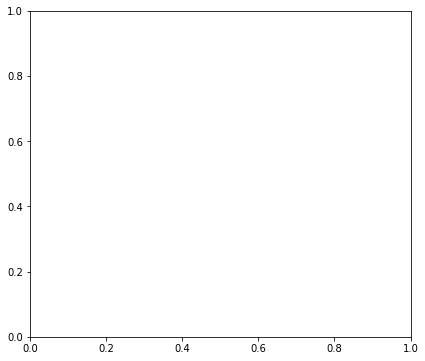

In [9]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
sns.countplot(y=population_col, data=df.sort_values(population_col))
plt.subplot(122)
df[population_col].value_counts().plot(kind='bar')

## Statistical analysis and vizualisation <a id="general" /a>
### General statistics
Number of records, mean, standard deviation, minimal value, quartiles, maximum value, mode, variance, skewness and kurtosis.

In [10]:
stats_list = []
cols = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'var', 'skew', 'kurtosis']
for pop in populations:
    stats_list.append([el for el in pop[1].describe()] + [NaN if pop[1].mode().empty else pop[1].mode()[0],pop[1].var(),pop[1].skew(),pop[1].kurtosis()])
stats_df = pd.DataFrame(stats_list, columns=cols, index=[pop[0] for pop in populations])

stats_df.head()

NameError: name 'populations' is not defined

In [11]:
You can use plots to visualize statistics about your data

You can try: 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'var', 'skew', 'kurtosis'

SyntaxError: invalid syntax (<ipython-input-11-b4b3132bc43a>, line 1)

In [12]:
plt.figure(figsize=(18,6))
stats_df['count'].plot(kind='bar')

NameError: name 'stats_df' is not defined

<Figure size 1296x432 with 0 Axes>

### Histogram & Distplot
Histograms let you see the number of occurrences in your value column for each population.

In [13]:
g = sns.FacetGrid(df[[value_col, population_col]], col=population_col, col_wrap=4)
g.map(plt.hist, value_col);

NameError: name 'sns' is not defined

Distplots combine an histogram with a kernel density estimation. We plot these only for populations with more than 10 occurrences.

In [14]:
g = sns.FacetGrid(df_mult_val, col=population_col, col_wrap=4)
g.map(sns.distplot, value_col);

NameError: name 'sns' is not defined

In [15]:
Histograms and distplots for all populations can also be displayed on the same graph. Hard to read if you have many populations.

SyntaxError: invalid syntax (<ipython-input-15-e1a58b4d4a1b>, line 1)

NameError: name 'pop_mult_val' is not defined

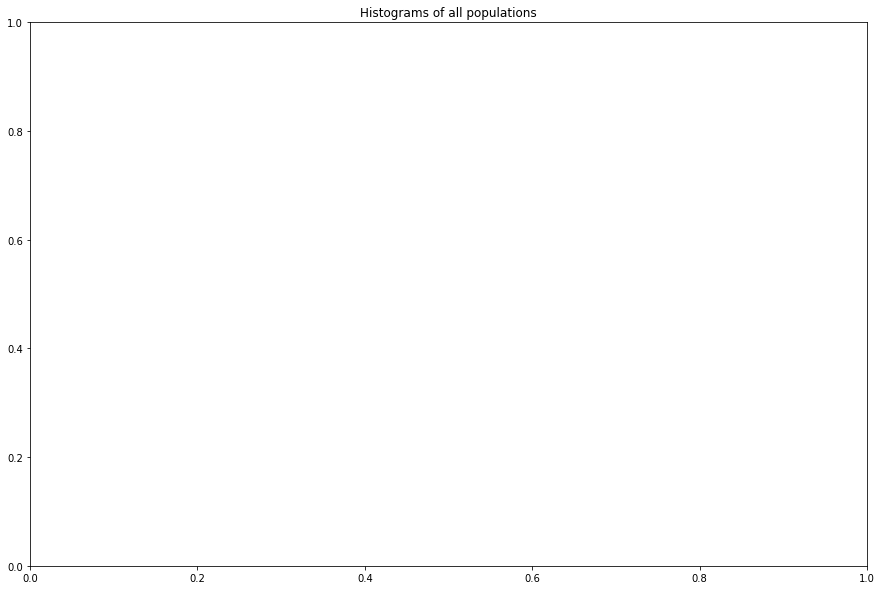

In [16]:
plt.figure(figsize=(15,10))
plt.title("Histograms of all populations")
for pop in pop_mult_val.index:
    plt.hist(df_mult_val[df_mult_val[population_col]==pop][value_col], label =  pop)
plt.legend()
plt.show()

NameError: name 'pop_mult_val' is not defined

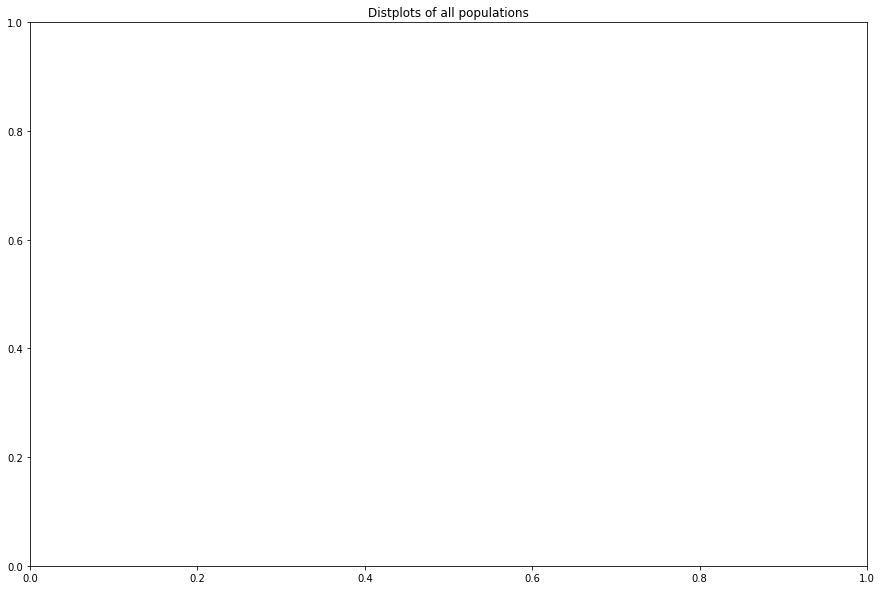

In [17]:
plt.figure(figsize=(15,10))
plt.title("Distplots of all populations")
for pop in pop_mult_val.index:
    sns.distplot(df_mult_val[df_mult_val[population_col]==pop][value_col], kde_kws={"label": pop})


### Box plots
A simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle. Plotted only for populations with more than 10 elements.

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x=value_col, y=population_col, data=df_mult_val);

NameError: name 'sns' is not defined

<Figure size 1080x720 with 0 Axes>

### Violin plots
The violin plot is similar to box plots, except that they also show the probability density of the data at different values. Violin plots include a marker for the median of the data and a box indicating the interquartile range, as in standard box plots. Overlaid on this box plot is a kernel density estimation. 

plt.figure(figsize=(15,10))
sns.violinplot(x=value_col, y=population_col, data=df_mult_val);

### Letter value plots
Letter value plots are an improvement upon boxplots for large datasets.

They display the median and the quartiles, like a standard box plot, but will also draw boxes for subsequent "eights", "sixteenth" etc... which are generically called letter values.

A cut off condition will leave a reasonable number of outliers out of the final boxes, helping you spot them easily.

Letter valuer plot give a good sense of the distribution of data, and of its skewness.

Plotted only for populations with more than 10 elements.

In [19]:
plt.figure(figsize=(15,10))
sns.lvplot(x=value_col, y=population_col, data=df_mult_val);

NameError: name 'sns' is not defined

<Figure size 1080x720 with 0 Axes>

## Statistical testing <a id="tests" /a>
Statistical tests will be computed by default for the two largest populations found.

In [20]:
[[pop_name_1, df_pop_1], [pop_name_2, df_pop_2]] = [ pop for pop in populations[0:2]]
print "Series '%s' has %s and series '%s' has %s records" % (pop_name_1, df_pop_1.count(), pop_name_2, df_pop_2.count())

SyntaxError: invalid syntax (<ipython-input-20-425a277515ce>, line 2)

**Reminder:** For a given significance level (e.g. 0.05), if the resulting p-value is smaller (p < 0.05), the null hypothesis is rejected. Otherwise (p ≥ 0.05) it cannot be rejected.

In [21]:
# Define your confidence threshold here, default is 0.05
confidence = 0.05

In [22]:
def analyse_results(confidence, pvalue, message, population_name):
    if pvalue < confidence:
        print "The hypothesis of " + message + " for "+ population_name + " is rejected with pvalue %s (smaller than %s)" % (pvalue, confidence)
    else:
        print "The hypothesis of " + message + " for "+ population_name + " can not be rejected, pvalue was %s (greater than %s)" % (pvalue, confidence)

SyntaxError: invalid syntax (<ipython-input-22-c0d4ce495a91>, line 3)

## Single population tests <a id="tests_single" /a>
### Goodness of fit with a normal law: Shapiro-Wilk test
The null-hypothesis of this test is that the population is normally distributed.

In [23]:
pvalue_1 = stats.shapiro(df_pop_1)[1]
pvalue_2 = stats.shapiro(df_pop_2)[1]
test = 'normal distribution'
analyse_results(confidence, pvalue_1, test, pop_name_1)
analyse_results(confidence, pvalue_2, test, pop_name_2)

NameError: name 'stats' is not defined

### Test for the average value
The null-hypothesis of this test is that the population has the specified mean.

In [24]:
# Define the mean you ant to test for here
tested_mean = 0

In [25]:
pvalue_1 = stats.ttest_1samp(df_pop_1, tested_mean).pvalue
pvalue_2 = stats.ttest_1samp(df_pop_2, tested_mean).pvalue
test = 'mean=%s' % (tested_mean)
analyse_results(confidence, pvalue_1, test, pop_name_1)
analyse_results(confidence, pvalue_2, test, pop_name_2)

NameError: name 'stats' is not defined

## Two - population tests <a id="tests_two_pop" /a>
### Student test
The null-hypothesis of this test is that both populations have the same average, variance is assumed to be equal.

In [26]:
pvalue = stats.ttest_ind(df_pop_1, df_pop_2).pvalue
test = 'equal averages'
analyse_results(confidence, pvalue, test, pop_name_1 + " and " + pop_name_2)

NameError: name 'stats' is not defined

### Kolmogorov-Smirnov test
The null-hypothesis of this test is that both populations follow the same distribution.

In [27]:
pvalue = stats.ks_2samp(df_pop_1, df_pop_2).pvalue
test = 'same distributions'
analyse_results(confidence, pvalue, test, pop_name_1 + " and " + pop_name_2)

NameError: name 'stats' is not defined

**Other tests**

You can use the Kruskal-Wallis H-test to test for **equal median** with `stats.kruskal`

You can use the Levene test to test for **equal variance** with `stats.levene`